# Loan default detection 

In [176]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings(action="ignore")
import itertools

### Loading the First Dataset

In [218]:
df=pd.read_csv("application_data.csv")

In [219]:
df.shape #To check the number of rows and columns in the file

(307511, 122)

In [220]:
df.head() #To display the first 5 rows of the dataset

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,0.0690,0.0833,0.1250,0.0369,0.0202,0.0190,0.0000,0.0000,0.0252,0.0383,0.9722,0.6341,0.0144,0.0000,0.0690,0.0833,0.1250,0.0377,0.022,0.0198,0.0,0.0,0.0250,0.0369,0.9722,0.6243,0.0144,0.00,0.0690,0.0833,0.1250,0.0375,0.0205,0.0193,0.0000,0.00,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.311267,0.622246,NaN,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,0.0345,0.2917,0.3333,0.0130,0.0773,0.0549,0.0039,0.0098,0.0924,0.0538,0.9851,0.8040,0.0497,0.0806,0.0345,0.2917,0.3333,0.0128,0.079,0.0554,0.0,0.0,0.0968,0.0529,0.9851,0.7987,0.0608,0.08,0.0345,0.2917,0.3333,0.0132,0.0787,0.0558,0.0039,0.01,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,26.0,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,NaN,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

In [37]:
df.info() #To get info about datatypes of all columns 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 73 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   SK_ID_CURR                   307511 non-null  int64  
 1   TARGET                       307511 non-null  int64  
 2   NAME_CONTRACT_TYPE           307511 non-null  object 
 3   CODE_GENDER                  307511 non-null  object 
 4   FLAG_OWN_CAR                 307511 non-null  object 
 5   FLAG_OWN_REALTY              307511 non-null  object 
 6   CNT_CHILDREN                 307511 non-null  int64  
 7   AMT_INCOME_TOTAL             307511 non-null  float64
 8   AMT_CREDIT                   307511 non-null  float64
 9   AMT_ANNUITY                  307499 non-null  float64
 10  AMT_GOODS_PRICE              307233 non-null  float64
 11  NAME_TYPE_SUITE              306219 non-null  object 
 12  NAME_INCOME_TYPE             307511 non-null  object 
 13 

There are 65 columns having float values, 41 columns having integer values and 16 columns holding object values.

In [221]:
pd.set_option('display.max_rows',122) #To display values for all columns rather than some columns.

In [222]:
(100*df.isnull().mean())
    

SK_ID_CURR                       0.000000
TARGET                           0.000000
NAME_CONTRACT_TYPE               0.000000
CODE_GENDER                      0.000000
FLAG_OWN_CAR                     0.000000
FLAG_OWN_REALTY                  0.000000
CNT_CHILDREN                     0.000000
AMT_INCOME_TOTAL                 0.000000
AMT_CREDIT                       0.000000
AMT_ANNUITY                      0.003902
AMT_GOODS_PRICE                  0.090403
NAME_TYPE_SUITE                  0.420148
NAME_INCOME_TYPE                 0.000000
NAME_EDUCATION_TYPE              0.000000
NAME_FAMILY_STATUS               0.000000
NAME_HOUSING_TYPE                0.000000
REGION_POPULATION_RELATIVE       0.000000
DAYS_BIRTH                       0.000000
DAYS_EMPLOYED                    0.000000
DAYS_REGISTRATION                0.000000
DAYS_ID_PUBLISH                  0.000000
OWN_CAR_AGE                     65.990810
FLAG_MOBIL                       0.000000
FLAG_EMP_PHONE                   0

As observed a lot of columns in the dataset have more than 40% missing values. So these columns must be dropped in order to get better understanding of the data. 

In order to get rid of columns with more than 40% missing values; Calculating the minimum count based on the percentage of NaN values; Using dropna function and setting threshold to minimum count.

In [223]:
min_per = 40
min_cnt = int(((100-min_per)/100)*df.shape[0] + 1)
df = df.dropna( axis=1, thresh=min_cnt)

In [224]:
(100*df.isnull().mean())

SK_ID_CURR                      0.000000
TARGET                          0.000000
NAME_CONTRACT_TYPE              0.000000
CODE_GENDER                     0.000000
FLAG_OWN_CAR                    0.000000
FLAG_OWN_REALTY                 0.000000
CNT_CHILDREN                    0.000000
AMT_INCOME_TOTAL                0.000000
AMT_CREDIT                      0.000000
AMT_ANNUITY                     0.003902
AMT_GOODS_PRICE                 0.090403
NAME_TYPE_SUITE                 0.420148
NAME_INCOME_TYPE                0.000000
NAME_EDUCATION_TYPE             0.000000
NAME_FAMILY_STATUS              0.000000
NAME_HOUSING_TYPE               0.000000
REGION_POPULATION_RELATIVE      0.000000
DAYS_BIRTH                      0.000000
DAYS_EMPLOYED                   0.000000
DAYS_REGISTRATION               0.000000
DAYS_ID_PUBLISH                 0.000000
FLAG_MOBIL                      0.000000
FLAG_EMP_PHONE                  0.000000
FLAG_WORK_PHONE                 0.000000
FLAG_CONT_MOBILE

The OCCUPATION_TYPE column shows null values more than 30%, replacing those values with "other".

In [225]:
df["OCCUPATION_TYPE"]=df["OCCUPATION_TYPE"].fillna("other")

In [226]:
df["OCCUPATION_TYPE"].value_counts()

other                    96391
Laborers                 55186
Sales staff              32102
Core staff               27570
Managers                 21371
Drivers                  18603
High skill tech staff    11380
Accountants               9813
Medicine staff            8537
Security staff            6721
Cooking staff             5946
Cleaning staff            4653
Private service staff     2652
Low-skill Laborers        2093
Waiters/barmen staff      1348
Secretaries               1305
Realty agents              751
HR staff                   563
IT staff                   526
Name: OCCUPATION_TYPE, dtype: int64

As observed from the data(keeping the imputed values aside) maximum number of applicants are Laborers

Creating groups on basis of similar column types and converting them to dataframes for analyzing

In [227]:
Days_columns = [col for col in df.columns if "DAYS" in col]
Day_df=df[Days_columns+["TARGET"]]

In [228]:
Amt_columns = [col for col in df.columns if "AMT" in col]
Amt_df= df[Amt_columns+["TARGET"]]

In [229]:
Name_columns = [col for col in df.columns if "NAME" in col]
Name_df= df[Name_columns+["TARGET"]]

In [230]:
Flag_columns = [col for col in df.columns if "FLAG" in col]
Flag_df= df[Flag_columns+["TARGET"]]

Checking the relevance of these columns with respect to TARGET variable

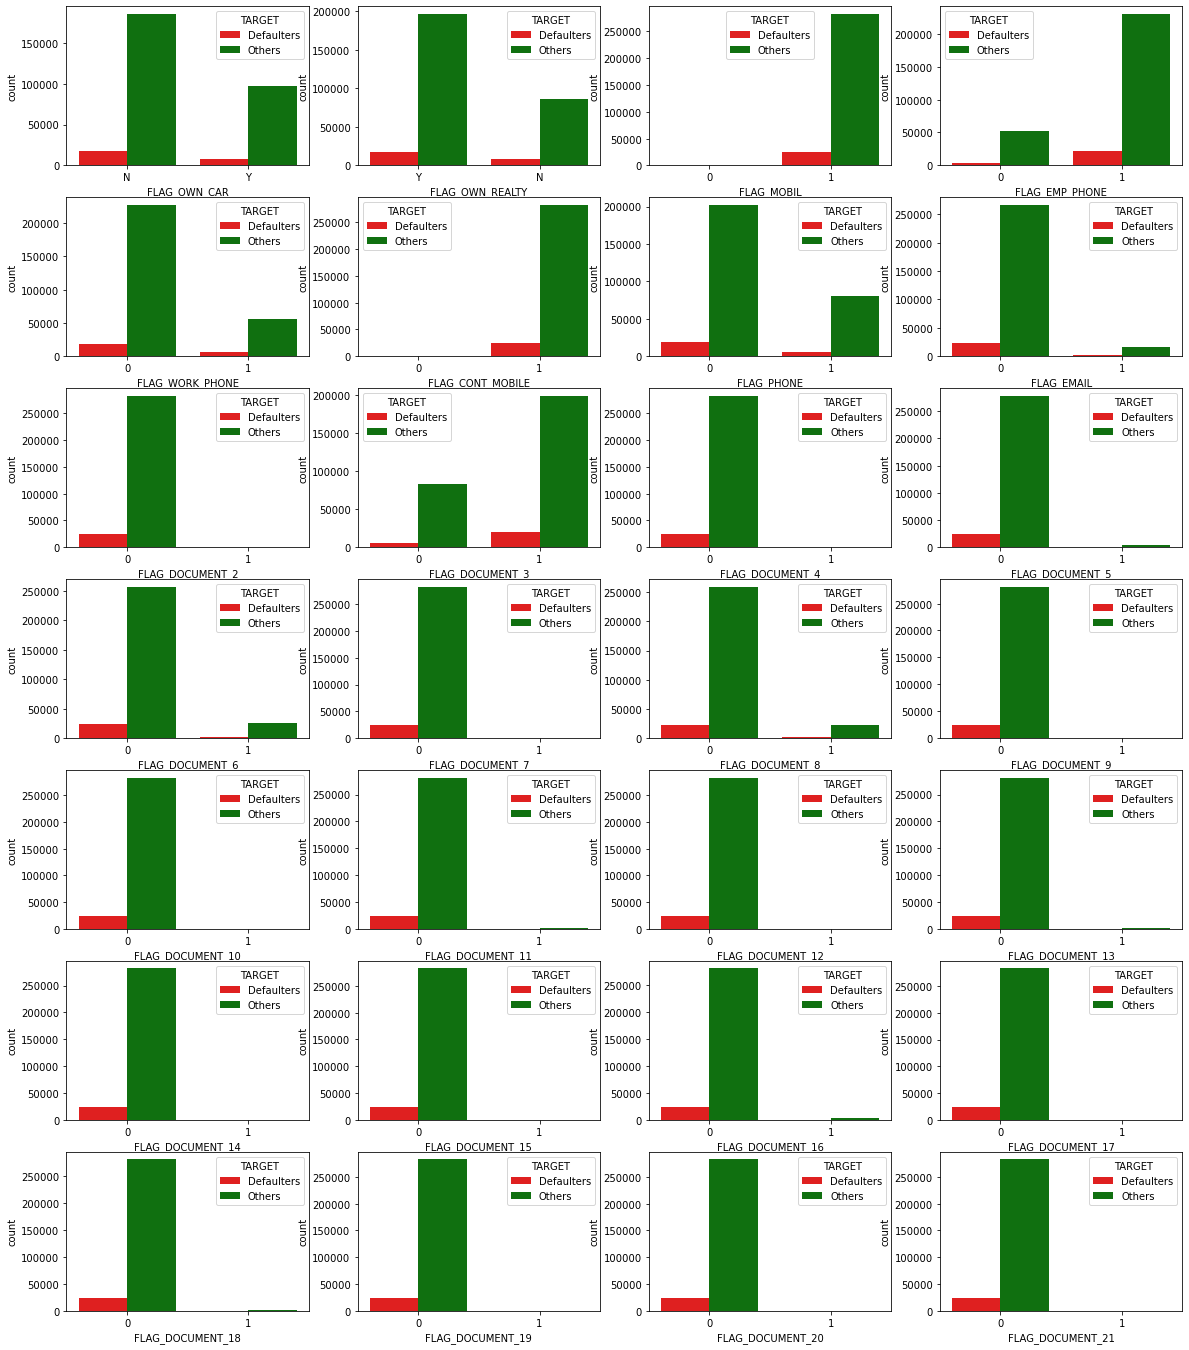

In [231]:
l = len(Flag_columns)

Flag_df["TARGET"] = Flag_df["TARGET"].replace({1:"Defaulters",0:"Others"})
fig = plt.figure(figsize=(20,24))

for i,j in itertools.zip_longest(Flag_columns,range(l)):
    plt.subplot(7,4,j+1)
    ax = sns.countplot(Flag_df[i], hue = Flag_df["TARGET"], palette = ["r","g"])
    


As observed from the flag documents except FLAG_OWN_CAR, FLAG_OWN_REALTY, FLAG_DOCUMENT_3, FLAG_PHONE; the rest columns can be dropped as these documents are not been submitted by all clients.

In [232]:
Flag_columns.remove('FLAG_DOCUMENT_3')
Flag_columns.remove('FLAG_OWN_CAR')
Flag_columns.remove('FLAG_OWN_REALTY')
Flag_columns.remove('FLAG_PHONE')

Converting Days into years and removing negative sign

In [411]:
Day_df=abs(Day_df)
df["DAYS_BIRTH"]=abs(df["DAYS_BIRTH"])
df["DAYS_EMPLOYED"]=abs(df["DAYS_EMPLOYED"])
df["DAYS_REGISTRATION"]=abs(df["DAYS_REGISTRATION"])
df["DAYS_ID_PUBLISH"]=abs(df["DAYS_ID_PUBLISH"])

In [234]:
Day_df["AGE"]=round(Day_df["DAYS_BIRTH"]/365,2)
Day_df["AGE"]

0         25.92
1         45.93
2         52.18
3         52.07
4         54.61
          ...  
307506    25.55
307507    56.92
307508    41.00
307509    32.77
307510    46.18
Name: AGE, Length: 307511, dtype: float64

Treating NaN values AMT_columns, dropping columns with no or less relevance to the target column

In [235]:
df=df.drop("EXT_SOURCE_3",axis=1)

In [236]:
df.drop(labels=Flag_columns,axis=1,inplace=True)

In [237]:
for i in Amt_df:
    df[i]=df[i].fillna(df[i].median())

In [239]:
(100*df.isnull().mean())

SK_ID_CURR                     0.000000
TARGET                         0.000000
NAME_CONTRACT_TYPE             0.000000
CODE_GENDER                    0.000000
FLAG_OWN_CAR                   0.000000
FLAG_OWN_REALTY                0.000000
CNT_CHILDREN                   0.000000
AMT_INCOME_TOTAL               0.000000
AMT_CREDIT                     0.000000
AMT_ANNUITY                    0.000000
AMT_GOODS_PRICE                0.000000
NAME_TYPE_SUITE                0.420148
NAME_INCOME_TYPE               0.000000
NAME_EDUCATION_TYPE            0.000000
NAME_FAMILY_STATUS             0.000000
NAME_HOUSING_TYPE              0.000000
REGION_POPULATION_RELATIVE     0.000000
DAYS_BIRTH                     0.000000
DAYS_EMPLOYED                  0.000000
DAYS_REGISTRATION              0.000000
DAYS_ID_PUBLISH                0.000000
FLAG_PHONE                     0.000000
OCCUPATION_TYPE                0.000000
CNT_FAM_MEMBERS                0.000650
REGION_RATING_CLIENT           0.000000


In [212]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 48 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   SK_ID_CURR                   307511 non-null  int64  
 1   TARGET                       307511 non-null  int64  
 2   NAME_CONTRACT_TYPE           307511 non-null  object 
 3   CODE_GENDER                  307511 non-null  object 
 4   FLAG_OWN_CAR                 307511 non-null  object 
 5   FLAG_OWN_REALTY              307511 non-null  object 
 6   CNT_CHILDREN                 307511 non-null  int64  
 7   AMT_INCOME_TOTAL             307511 non-null  float64
 8   AMT_CREDIT                   307511 non-null  float64
 9   AMT_ANNUITY                  307511 non-null  float64
 10  AMT_GOODS_PRICE              307511 non-null  float64
 11  NAME_TYPE_SUITE              306219 non-null  object 
 12  NAME_INCOME_TYPE             307511 non-null  object 
 13 

As the null values have been dealt with, left with 48 columns; now Checking for Outliers

In [240]:
df.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_PHONE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_2,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_3,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.000000,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307511.000000,3.075110e+05,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307509.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,3.068510e+05,306490.000000,306490.000000,306490.000000,306490.000000,307510.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000
mean,278180.518577,0.080729,0.417052,1.687979e+05,5.990260e+05,27108.487841,5.383163e+05,0.020868,-16036.995067,63815.045904,-4986.120328,-2994.202373,0.281066,2.152665,2.052463,2.031521,12.063419,0.015144,0.050769,0.040659,0.078173,0.230454,0.179555,5.143927e-01,1.422245,0.143421,1.405292,0.100049,-962.858788,0.710023,0.005538,0.006055,0.029723,0.231293,0.229631,1.778463
std,102790.175348,0.272419,0.722121,2.371231e+05,4.024908e+05,14493.461065,3.692890e+05,0.013831,4363.988632,141275.766519,3522.886321,1509.450419,0.449521,0.910682,0.509034,0.502737,3.265832,0.122126,0.219526,0.197499,0.268444,0.421124,0.383817,1.910602e-01,2.400989,0.446698,2.379803,0.362291,826.808487,0.453752,0.078014,0.103037,0.190728,0.856810,0.744059,1.765523
min,100002.000000,0.000000,0.000000,2.565000e+04,4.500000e+04,1615.500000,4.050000e+04,0.000290,-25229.000000,-17912.000000,-24672.000000,-7197.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.173617e-08,0.000000,0.000000,0.000000,0.000000,-4292.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,189145.500000,0.000000,0.000000,1.125000e+05,2.700000e+05,16524.000000,2.385000e+05,0.010006,-19682.000000,-2760.000000,-7479.500000,-4299.000000,0.000000,2.000000,2.000000,2.000000,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.924574e-01,0.000000,0.000000,0.000000,0.000000,-1570.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,278202.000000,0.000000,0.000000,1.471500e+05,5.135310e+05,24903.000000,4.500000e+05,0.018850,-15750.000000,-1213.000000,-4504.000000,-3254.000000,0.000000,2.000000,2.000000,2.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.659614e-01,0.000000,0.000000,0.000000,0.000000,-757.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,367142.500000,0.000000,1.000000,2.025000e+05,8.086500e+05,34596.000000,6.795000e+05,0.028663,-12413.000000,-289.000000,-2010.000000,-1720.000000,1.000000,3.000000,2.000000,2.000000,14.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.636171e-01,2.000000,0.000000,2.000000,0.000000,-274.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
max,456255.000000,1.000000,19.000000,1.170000e+08,4.050000e+06,258025.500000,4.050000e+06,0.072508,-7489.000000,365243.000000,0.000000,0.000000,1.000000,20.000000,3.000000,3.000000,23.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,8.549997e-01,348.000000,34.000000,344.000000,24.000000,0.000000,1.000000,4.000000,9.000000,8.000000,27.000000,261.000000,25.000000


To check for outliers we look for the columns with more difference between max and 75% and place them in a new dataset. 

In [241]:
Outlier_df=["CNT_CHILDREN","AMT_INCOME_TOTAL","AMT_CREDIT", "AMT_ANNUITY", "AMT_GOODS_PRICE"]

CNT_CHILDREN


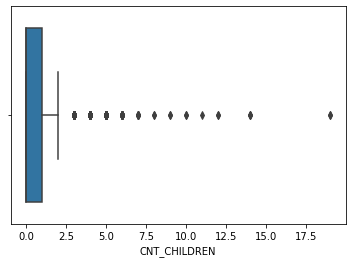

AMT_INCOME_TOTAL


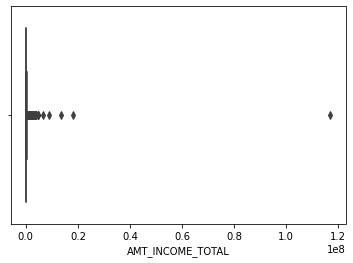

AMT_CREDIT


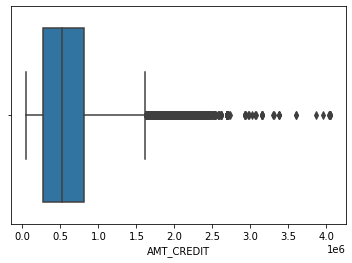

AMT_ANNUITY


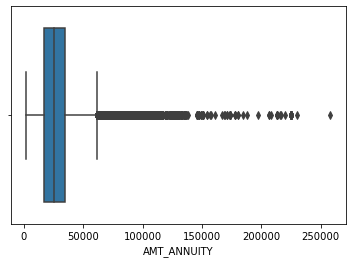

AMT_GOODS_PRICE


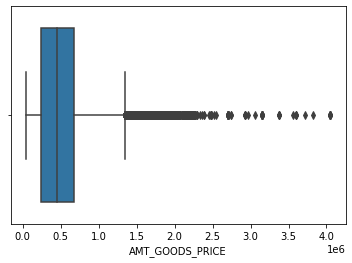

In [242]:
for i in Outlier_df:
    print(i)
    sns.boxplot(df[i])
    plt.show()

CNT_CHILDREN has some Outliers and can be modified using IQR method, whereas the AMT_columns are having a lot of outliers and may affect the data.

Importing the previous application file

In [243]:
df2=pd.read_csv("previous_application.csv")

In [244]:
df2.shape

(1670214, 37)

In [247]:
df2.head(10)

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_TYPE_SUITE,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,Y,1,0.0,0.182832,0.867336,XAP,Approved,-73,Cash through the bank,XAP,NaN,Repeater,Mobile,POS,XNA,Country-wide,35,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-164,XNA,XAP,Unaccompanied,Repeater,XNA,Cash,x-sell,Contact center,-1,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-301,Cash through the bank,XAP,"Spouse, partner",Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,Y,1,NaN,NaN,NaN,XNA,Approved,-512,Cash through the bank,XAP,NaN,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,Y,1,NaN,NaN,NaN,Repairs,Refused,-781,Cash through the bank,HC,NaN,Repeater,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN
5,1383531,199383,Cash loans,23703.930,315000.0,340573.5,NaN,315000.0,SATURDAY,8,Y,1,NaN,NaN,NaN,Everyday expenses,Approved,-684,Cash through the bank,XAP,Family,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,18.0,low_normal,Cash X-Sell: low,365243.0,-654.0,-144.0,-144.0,-137.0,1.0
6,2315218,175704,Cash loans,NaN,0.0,0.0,NaN,NaN,TUESDAY,11,Y,1,NaN,NaN,NaN,XNA,Canceled,-14,XNA,XAP,NaN,Repeater,XNA,XNA,XNA,Credit and cash offices,-1,XNA,NaN,XNA,Cash,NaN,NaN,NaN,NaN,NaN,NaN
7,1656711,296299,Cash loans,NaN,0.0,0.0,NaN,NaN,MONDAY,7,Y,1,NaN,NaN,NaN,XNA,Canceled,-21,XNA,XAP,NaN,Repeater,XNA,XNA,XNA,Credit and cash offices,-1,XNA,NaN,XNA,Cash,NaN,NaN,NaN,NaN,NaN,NaN
8,2367563,342292,Cash loans,NaN,0.0,0.0,NaN,NaN,MONDAY,15,Y,1,NaN,NaN,NaN,XNA,Canceled,-386,XNA,XAP,NaN,Repeater,XNA,XNA,XNA,Credit and cash offices,-1,XNA,NaN,XNA,Cash,NaN,NaN,NaN,NaN,NaN,NaN
9,2579447,334349,Cash loans,NaN,0.0,0.0,NaN,NaN,SATURDAY,15,Y,1,NaN,NaN,NaN,XNA,Canceled,-57,XNA,XAP,NaN,Repeater,XNA,XNA,XNA,Credit and cash offices,-1,XNA,NaN,XNA,Cash,NaN,NaN,NaN,NaN,NaN,NaN


In [248]:
df2.describe()

,SK_ID_PREV,SK_ID_CURR,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,HOUR_APPR_PROCESS_START,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,DAYS_DECISION,SELLERPLACE_AREA,CNT_PAYMENT,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
count,1.670214e+06,1.670214e+06,1.297979e+06,1.670214e+06,1.670213e+06,7.743700e+05,1.284699e+06,1.670214e+06,1.670214e+06,774370.000000,5951.000000,5951.000000,1.670214e+06,1.670214e+06,1.297984e+06,997149.000000,997149.000000,997149.000000,997149.000000,997149.000000,997149.000000
mean,1.923089e+06,2.783572e+05,1.595512e+04,1.752339e+05,1.961140e+05,6.697402e+03,2.278473e+05,1.248418e+01,9.964675e-01,0.079637,0.188357,0.773503,-8.806797e+02,3.139511e+02,1.605408e+01,342209.855039,13826.269337,33767.774054,76582.403064,81992.343838,0.332570
std,5.325980e+05,1.028148e+05,1.478214e+04,2.927798e+05,3.185746e+05,2.092150e+04,3.153966e+05,3.334028e+00,5.932963e-02,0.107823,0.087671,0.100879,7.790997e+02,7.127443e+03,1.456729e+01,88916.115834,72444.869708,106857.034789,149647.415123,153303.516729,0.471134
min,1.000001e+06,1.000010e+05,0.000000e+00,0.000000e+00,0.000000e+00,-9.000000e-01,0.000000e+00,0.000000e+00,0.000000e+00,-0.000015,0.034781,0.373150,-2.922000e+03,-1.000000e+00,0.000000e+00,-2922.000000,-2892.000000,-2801.000000,-2889.000000,-2874.000000,0.000000
25%,1.461857e+06,1.893290e+05,6.321780e+03,1.872000e+04,2.416050e+04,0.000000e+00,5.084100e+04,1.000000e+01,1.000000e+00,0.000000,0.160716,0.715645,-1.300000e+03,-1.000000e+00,6.000000e+00,365243.000000,-1628.000000,-1242.000000,-1314.000000,-1270.000000,0.000000
50%,1.923110e+06,2.787145e+05,1.125000e+04,7.104600e+04,8.054100e+04,1.638000e+03,1.123200e+05,1.200000e+01,1.000000e+00,0.051605,0.189122,0.835095,-5.810000e+02,3.000000e+00,1.200000e+01,365243.000000,-831.000000,-361.000000,-537.000000,-499.000000,0.000000
75%,2.384280e+06,3.675140e+05,2.065842e+04,1.803600e+05,2.164185e+05,7.740000e+03,2.340000e+05,1.500000e+01,1.000000e+00,0.108909,0.193330,0.852537,-2.800000e+02,8.200000e+01,2.400000e+01,365243.000000,-411.000000,129.000000,-74.000000,-44.000000,1.000000
max,2.845382e+06,4.562550e+05,4.180581e+05,6.905160e+06,6.905160e+06,3.060045e+06,6.905160e+06,2.300000e+01,1.000000e+00,1.000000,1.000000,1.000000,-1.000000e+00,4.000000e+06,8.400000e+01,365243.000000,365243.000000,365243.000000,365243.000000,365243.000000,1.000000


The new dataset has 37 columns; SK_ID_CURR can be used to link both datasets; A lot of values are having negative sign, so cleaning of data must be done before analysis

In [249]:
(100*df2.isnull().mean())

SK_ID_PREV                      0.000000
SK_ID_CURR                      0.000000
NAME_CONTRACT_TYPE              0.000000
AMT_ANNUITY                    22.286665
AMT_APPLICATION                 0.000000
AMT_CREDIT                      0.000060
AMT_DOWN_PAYMENT               53.636480
AMT_GOODS_PRICE                23.081773
WEEKDAY_APPR_PROCESS_START      0.000000
HOUR_APPR_PROCESS_START         0.000000
FLAG_LAST_APPL_PER_CONTRACT     0.000000
NFLAG_LAST_APPL_IN_DAY          0.000000
RATE_DOWN_PAYMENT              53.636480
RATE_INTEREST_PRIMARY          99.643698
RATE_INTEREST_PRIVILEGED       99.643698
NAME_CASH_LOAN_PURPOSE          0.000000
NAME_CONTRACT_STATUS            0.000000
DAYS_DECISION                   0.000000
NAME_PAYMENT_TYPE               0.000000
CODE_REJECT_REASON              0.000000
NAME_TYPE_SUITE                49.119754
NAME_CLIENT_TYPE                0.000000
NAME_GOODS_CATEGORY             0.000000
NAME_PORTFOLIO                  0.000000
NAME_PRODUCT_TYP

Removing the columns with more than 40% missing values

In [250]:
min_per = 40
min_cnt = int(((100-min_per)/100)*df2.shape[0] + 1)
df2 = df2.dropna( axis=1, thresh=min_cnt)

In [251]:
(100*df2.isnull().mean())

SK_ID_PREV                      0.000000
SK_ID_CURR                      0.000000
NAME_CONTRACT_TYPE              0.000000
AMT_ANNUITY                    22.286665
AMT_APPLICATION                 0.000000
AMT_CREDIT                      0.000060
AMT_GOODS_PRICE                23.081773
WEEKDAY_APPR_PROCESS_START      0.000000
HOUR_APPR_PROCESS_START         0.000000
FLAG_LAST_APPL_PER_CONTRACT     0.000000
NFLAG_LAST_APPL_IN_DAY          0.000000
NAME_CASH_LOAN_PURPOSE          0.000000
NAME_CONTRACT_STATUS            0.000000
DAYS_DECISION                   0.000000
NAME_PAYMENT_TYPE               0.000000
CODE_REJECT_REASON              0.000000
NAME_CLIENT_TYPE                0.000000
NAME_GOODS_CATEGORY             0.000000
NAME_PORTFOLIO                  0.000000
NAME_PRODUCT_TYPE               0.000000
CHANNEL_TYPE                    0.000000
SELLERPLACE_AREA                0.000000
NAME_SELLER_INDUSTRY            0.000000
CNT_PAYMENT                    22.286366
NAME_YIELD_GROUP

Imputing the NaN values with median as the columns are numerical

In [252]:
df2["AMT_ANNUITY"]=df2["AMT_ANNUITY"].fillna(df2["AMT_ANNUITY"].median())

In [253]:
df2["AMT_GOODS_PRICE"]=df2["AMT_GOODS_PRICE"].fillna(df2["AMT_GOODS_PRICE"].median())

In [254]:
df2["CNT_PAYMENT"]=df2["CNT_PAYMENT"].fillna(df2["CNT_PAYMENT"].median())

In [255]:
(100*df2.isnull().mean())

SK_ID_PREV                     0.000000
SK_ID_CURR                     0.000000
NAME_CONTRACT_TYPE             0.000000
AMT_ANNUITY                    0.000000
AMT_APPLICATION                0.000000
AMT_CREDIT                     0.000060
AMT_GOODS_PRICE                0.000000
WEEKDAY_APPR_PROCESS_START     0.000000
HOUR_APPR_PROCESS_START        0.000000
FLAG_LAST_APPL_PER_CONTRACT    0.000000
NFLAG_LAST_APPL_IN_DAY         0.000000
NAME_CASH_LOAN_PURPOSE         0.000000
NAME_CONTRACT_STATUS           0.000000
DAYS_DECISION                  0.000000
NAME_PAYMENT_TYPE              0.000000
CODE_REJECT_REASON             0.000000
NAME_CLIENT_TYPE               0.000000
NAME_GOODS_CATEGORY            0.000000
NAME_PORTFOLIO                 0.000000
NAME_PRODUCT_TYPE              0.000000
CHANNEL_TYPE                   0.000000
SELLERPLACE_AREA               0.000000
NAME_SELLER_INDUSTRY           0.000000
CNT_PAYMENT                    0.000000
NAME_YIELD_GROUP               0.000000


The null values have been treated

Checking for outliers

In [397]:
df2.describe()

,SK_ID_PREV,SK_ID_CURR,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_GOODS_PRICE,HOUR_APPR_PROCESS_START,NFLAG_LAST_APPL_IN_DAY,DAYS_DECISION,SELLERPLACE_AREA,CNT_PAYMENT
count,1.670214e+06,1.670214e+06,1.670214e+06,1.670214e+06,1.670213e+06,1.670214e+06,1.670214e+06,1.670214e+06,1.670214e+06,1.670214e+06,1.670214e+06
mean,1.923089e+06,2.783572e+05,1.490651e+04,1.752339e+05,1.961140e+05,2.011815e+05,1.248418e+01,9.964675e-01,-8.806797e+02,3.139511e+02,1.281854e+01
std,5.325980e+05,1.028148e+05,1.317751e+04,2.927798e+05,3.185746e+05,2.808629e+05,3.334028e+00,5.932963e-02,7.790997e+02,7.127443e+03,7.051882e+00
min,1.000001e+06,1.000010e+05,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,-2.922000e+03,-1.000000e+00,1.000000e+00
25%,1.461857e+06,1.893290e+05,7.547096e+03,1.872000e+04,2.416050e+04,6.750000e+04,1.000000e+01,1.000000e+00,-1.300000e+03,-1.000000e+00,1.000000e+01
50%,1.923110e+06,2.787145e+05,1.125000e+04,7.104600e+04,8.054100e+04,1.123200e+05,1.200000e+01,1.000000e+00,-5.810000e+02,3.000000e+00,1.200000e+01
75%,2.384280e+06,3.675140e+05,1.682403e+04,1.803600e+05,2.164185e+05,1.804050e+05,1.500000e+01,1.000000e+00,-2.800000e+02,8.200000e+01,1.600000e+01
max,2.845382e+06,4.562550e+05,4.180581e+05,6.905160e+06,6.905160e+06,6.905160e+06,2.300000e+01,1.000000e+00,-1.000000e+00,4.000000e+06,2.500000e+01


Checking and treating outliers

<AxesSubplot:xlabel='CNT_PAYMENT'>

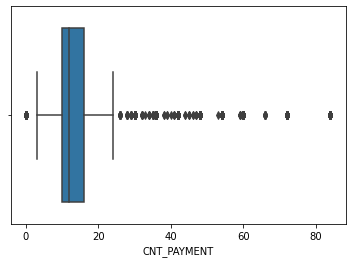

In [257]:
sns.boxplot(df2["CNT_PAYMENT"])

Using IQR method on CNT_PAYMENT for outliers

In [258]:
q1=df2["CNT_PAYMENT"].describe()["25%"]
q3=df2["CNT_PAYMENT"].describe()["75%"]
iqr=q3-q1
lower_bound=q1-1.5*iqr
upper_bound=q3+1.5*iqr

In [259]:
df2["CNT_PAYMENT"]=np.where(df2["CNT_PAYMENT"]>upper_bound,upper_bound,df2["CNT_PAYMENT"])
df2["CNT_PAYMENT"]=np.where(df2["CNT_PAYMENT"]<lower_bound,lower_bound,df2["CNT_PAYMENT"])

<AxesSubplot:xlabel='CNT_PAYMENT'>

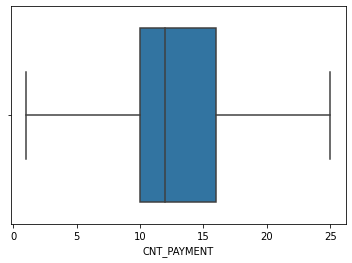

In [260]:
sns.boxplot(df2["CNT_PAYMENT"])

The outliers have been dissolved using capping,flooring method for CNT_PAYMENT

### Data Imbalance checking

In [261]:
df["TARGET"].value_counts(normalize= True)*100 #Checking the percentage of defaulters[1] and repayers(all other clients)[0]

0    91.927118
1     8.072882
Name: TARGET, dtype: float64

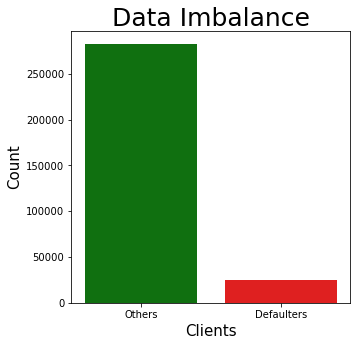

In [262]:
plt.figure(figsize= [5,5])
sns.barplot(x=["Others","Defaulters"], y = df["TARGET"].value_counts(), palette = ["g","r"],orient="v")
plt.ylabel("Count",fontdict = {"fontsize":15})
plt.xlabel("Clients",fontdict = {"fontsize":15})
plt.title("Data Imbalance", fontdict = {"fontsize":25}, pad = 5)
plt.show()

In [263]:
defaulters = (df["TARGET"].value_counts()[1]/len(df)* 100)
others = (df["TARGET"].value_counts()[0]/len(df)*100)
print("Imbalance ratio is:",round(others/defaulters,2),": 1")

Imbalance ratio is: 11.39 : 1


From the value counts and Graph of TARGET variable we can understand that there are approximately 8 % of Clients who are having payment difficulties. As well as the calculated Imbalance ratio is 11.39 : 1 for others and defaulters respectively, which is very high concluding that the data is highly imbalanced(It is a favourable indicator for the bank.)

## Segmentation

In [413]:
# Categorical and Numerical columns segmentation in Application dataset
cat1 = list(df.select_dtypes(["category"]).columns)   # Categorical 
num1 = list(df.select_dtypes(["int","float"]).columns)  # Numerical
# Categorical and Numerical columns segmentation in Previous Application dataset
cat2 = list(df2.select_dtypes(["category"]).columns)   # Categorical 
num2 = list(df2.select_dtypes(["int","float"]).columns)  # Numerical 

Merging both datasets based on "SK_ID_CURR" as there is no "TARGET" column in pervious_application dataset 

In [270]:
df2_mer=pd.merge(df[["SK_ID_CURR","TARGET"]],df2, how="left", on=["SK_ID_CURR"])

In [410]:
df2_mer["DAYS_DECISION"]=abs(df2_mer["DAYS_DECISION"])

In [271]:
df2_mer.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1430155 entries, 0 to 1430154
Data columns (total 27 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   SK_ID_CURR                   1430155 non-null  int64  
 1   TARGET                       1430155 non-null  int64  
 2   SK_ID_PREV                   1413701 non-null  float64
 3   NAME_CONTRACT_TYPE           1413701 non-null  object 
 4   AMT_ANNUITY                  1413701 non-null  float64
 5   AMT_APPLICATION              1413701 non-null  float64
 6   AMT_CREDIT                   1413700 non-null  float64
 7   AMT_GOODS_PRICE              1413701 non-null  float64
 8   WEEKDAY_APPR_PROCESS_START   1413701 non-null  object 
 9   HOUR_APPR_PROCESS_START      1413701 non-null  float64
 10  FLAG_LAST_APPL_PER_CONTRACT  1413701 non-null  object 
 11  NFLAG_LAST_APPL_IN_DAY       1413701 non-null  float64
 12  NAME_CASH_LOAN_PURPOSE       1413701 non-n

The "TARGET" column has been added to the previous application dataset, now analysis of previous_application dataset can be performed.

## Analysis

Analysis of Previous_Application dataset

Univariate Analysis

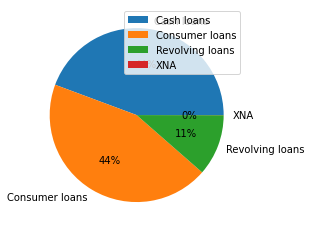

In [277]:
#NAME_CONTRACT_TYPE
y=df2_mer["NAME_CONTRACT_TYPE"].value_counts(normalize=True).values
lab=["Cash loans","Consumer loans","Revolving loans","XNA"]
plt.pie(y,labels=lab,autopct='%0.0f%%')
plt.legend()
plt.show()

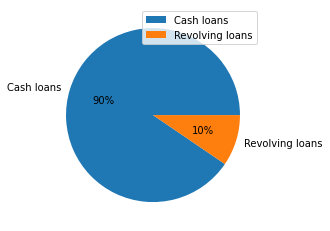

In [279]:
y=df["NAME_CONTRACT_TYPE"].value_counts(normalize=True).values
lab=["Cash loans","Revolving loans"]
plt.pie(y,labels=lab,autopct='%0.0f%%')
plt.legend()
plt.show()

In previous_application dataset there are nearly 45% of Cash loans and Consumer loans whereas, in new_application dataset 90% clients have cash loans; Revolving loan % is nearly the same in both datsets: Suggesting the credit card user count not changing much.

Column: WEEKDAY_APPR_PROCESS_START

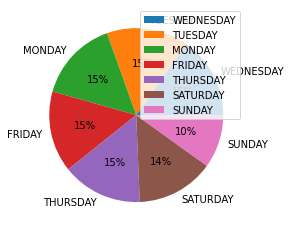

In [282]:
y=df2_mer["WEEKDAY_APPR_PROCESS_START"].value_counts(normalize=True).values
lab=["WEDNESDAY","TUESDAY","MONDAY","FRIDAY","THURSDAY","SATURDAY","SUNDAY"]
plt.pie(y,labels=lab,autopct='%0.0f%%')
plt.legend()
plt.show()

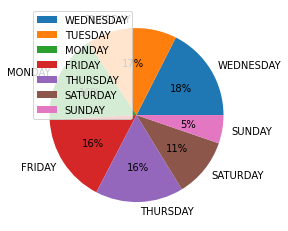

In [283]:
y=df["WEEKDAY_APPR_PROCESS_START"].value_counts(normalize=True).values
lab=["WEDNESDAY","TUESDAY","MONDAY","FRIDAY","THURSDAY","SATURDAY","SUNDAY"]
plt.pie(y,labels=lab,autopct='%0.0f%%')
plt.legend()
plt.show()

Insights: In both the datasets maximum number of clients have visited on Wednesday.

## Univariate Function

In [374]:
def univ(c1,d1):
    a=sns.countplot(d1[c1],hue=d1["TARGET"])
    a.set_xticklabels(a.get_xticklabels(), rotation=45, ha="right")
    plt.show()

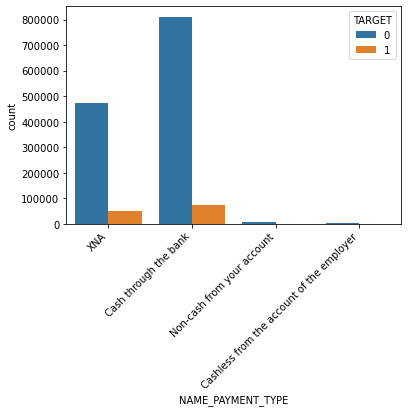

In [375]:
univ("NAME_PAYMENT_TYPE",df2_mer)

Maximum payment is done through cash

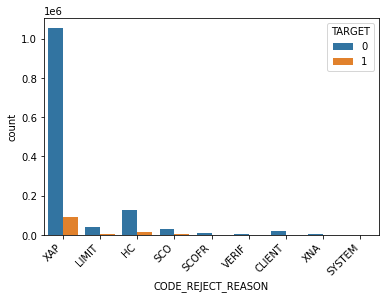

In [376]:
univ("CODE_REJECT_REASON",df2_mer)

Most of the reasons for rejection are not specified

In [295]:
df2_mer["NAME_CASH_LOAN_PURPOSE"].value_counts()

XAP                                 786937
XNA                                 567351
Repairs                              20117
Other                                13432
Urgent needs                          7236
Buying a used car                     2469
Building a house or an annex          2344
Everyday expenses                     2052
Medicine                              1871
Payments on other loans               1573
Education                             1334
Journey                               1042
Purchase of electronic equipment       934
Buying a new car                       886
Wedding / gift / holiday               801
Buying a home                          701
Car repairs                            691
Furniture                              660
Buying a holiday home / land           463
Business development                   359
Gasification / water supply            251
Buying a garage                        116
Hobby                                   45
Money for a

Most of the clients have not specified(XAP,XNA) their purpose of loans.

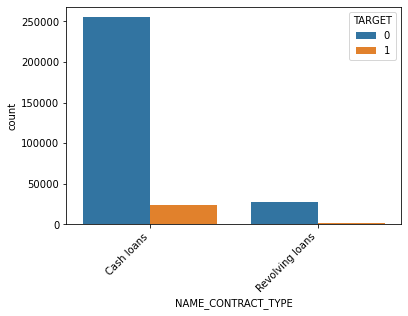

In [377]:
univ("NAME_CONTRACT_TYPE",df)

Clients prefer cash loans over revolving loans

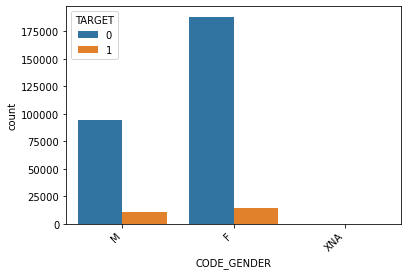

In [378]:
univ("CODE_GENDER",df)

The dataset contains more number of female clients, considering the ratios of male and female defaulters there seems to be more male defaulters.

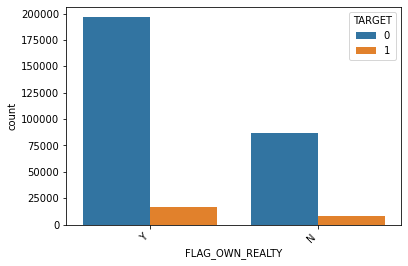

In [379]:
univ("FLAG_OWN_REALTY",df)

People with own realty take more loans as it is easy to get loans if you have own realty.


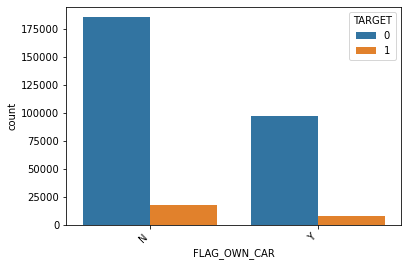

In [380]:
univ("FLAG_OWN_CAR",df)

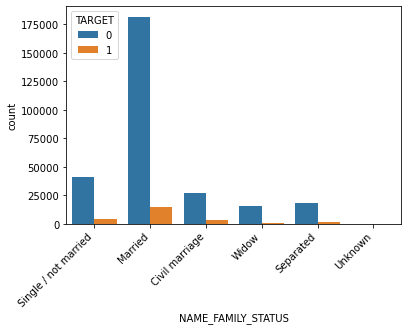

In [381]:
univ("NAME_FAMILY_STATUS",df)

The ratio of married people taking loans is extremely high in comparison to other categories

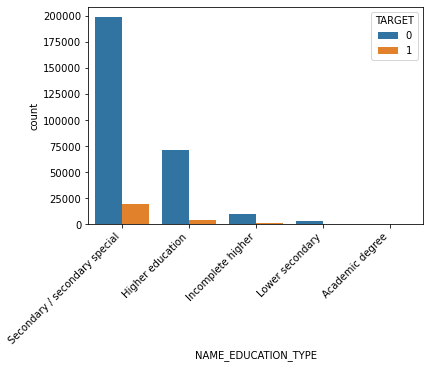

In [382]:
univ("NAME_EDUCATION_TYPE",df)

Nearly no people with only an Academic degree take loans; whereas, People with Secondary Degrees have high rate of taking/repaying loans.

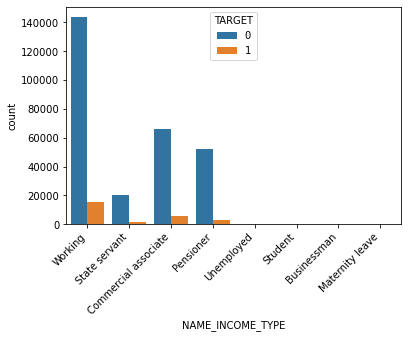

In [383]:
univ("NAME_INCOME_TYPE",df)

Other than the working class; pensioners and commercial associates also take a lot of loans; While the ratio of defaulters is nearly same for all, it can be deduced that pensioners might need loans due to delay in pension.

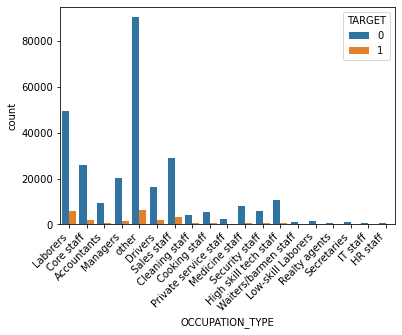

In [384]:
univ("OCCUPATION_TYPE",df)

#Laborers take a lot of loans and the ratio of defaulters is also high incase of laborers.

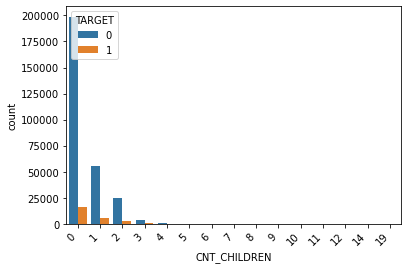

In [387]:
univ("CNT_CHILDREN",df)

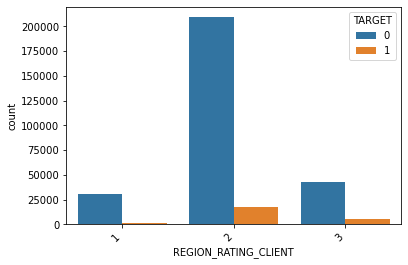

In [390]:
univ("REGION_RATING_CLIENT",df)

People with the rating of 2 take more loans comparison to 1,3 rated clients

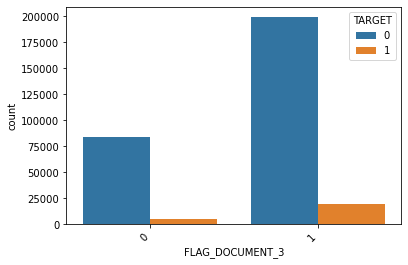

In [395]:
univ("FLAG_DOCUMENT_3",df)

Not much insights can be generated from FLAG_DOCUMENT_3 as both cases show similar trends.

## Bivariate Analysis

In [392]:
def bivar(x,y,dataset,h,fs):
    
    plt.figure(figsize=fs)
    sns.barplot(x=x,
                  y=y,
                  data=dataset, 
                  hue=h, 
                  palette =['g','r'])
    
    plt.xlabel(x,fontdict={'fontsize' : 12, 'fontweight' : 4, 'color' : 'Black'})    
    plt.ylabel(y,fontdict={'fontsize' : 12, 'fontweight' : 4, 'color' : 'Black'})    
    plt.title("Bivariate_Analysis", fontdict={'fontsize' : 10, 'fontweight' : 5, 'color' : 'Black'}) 
    plt.xticks(rotation=90, ha='right')
    
    plt.show()


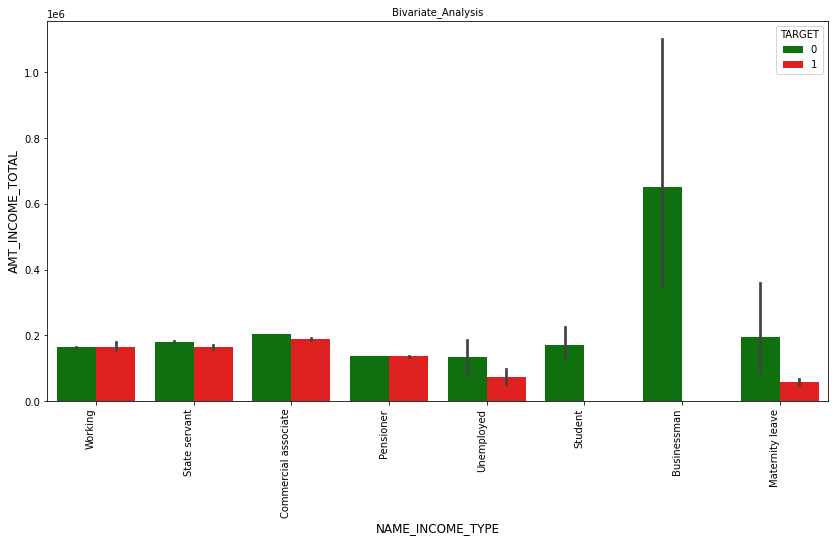

In [393]:
bivar("NAME_INCOME_TYPE","AMT_INCOME_TOTAL",df,"TARGET",(14,7))

Insights: Businessmen have highest income range and no defaulters, students also do not have any defaulters (As these might be credit card loans). The background check of working, pension lay class is mandatory as the ratio of defaulters income is similar to others in their case. 

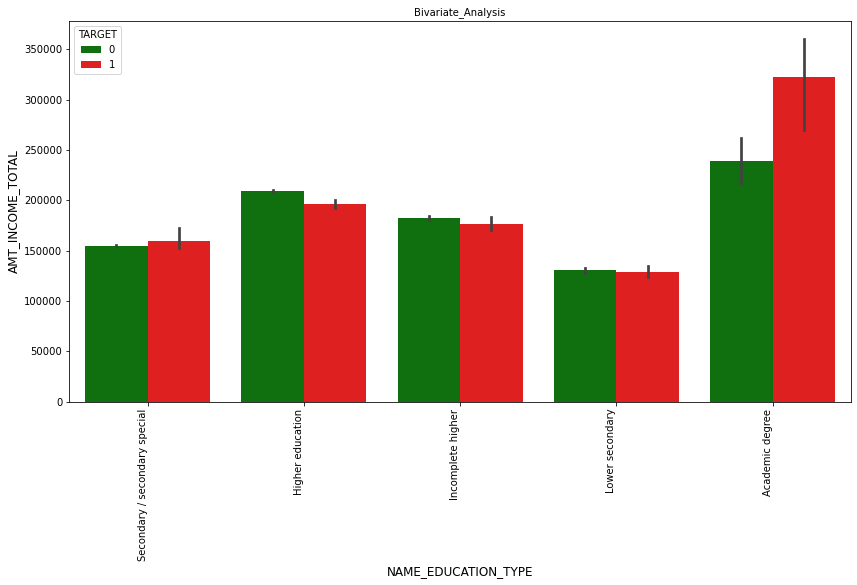

In [394]:
bivar("NAME_EDUCATION_TYPE","AMT_INCOME_TOTAL",df,"TARGET",(14,7))

#Graduates with an Academic degree have highest income range whereas, the highest number of defaulters are people with academic degree who earn the most. This suggests checking of academic degree and income of the client is a key factor in knowing wheather they will default or not.

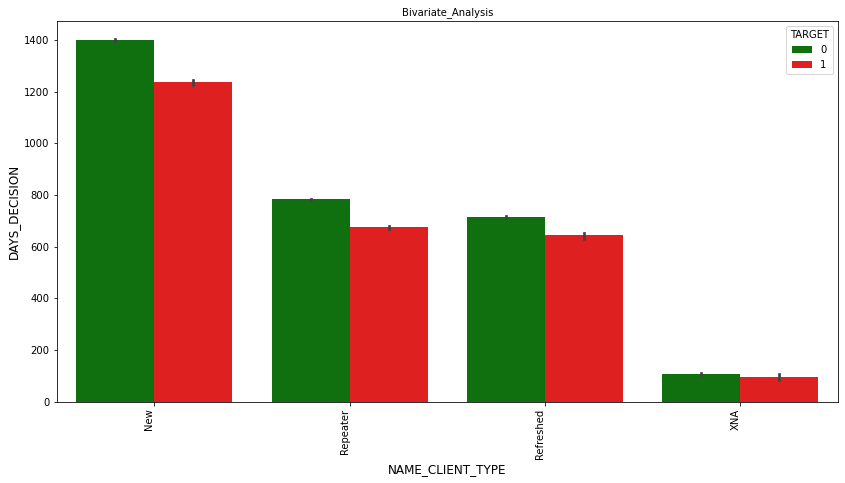

In [406]:
bivar("NAME_CLIENT_TYPE","DAYS_DECISION",df2_mer,"TARGET",(14,7))

More days are taken to decide wheather the loan should be granted or not in case of New Clients

Checking for Correlation within columns

In [425]:
num1

['TARGET',
 'CNT_CHILDREN',
 'AMT_INCOME_TOTAL',
 'AMT_CREDIT',
 'AMT_ANNUITY',
 'AMT_GOODS_PRICE',
 'REGION_POPULATION_RELATIVE',
 'DAYS_BIRTH',
 'DAYS_EMPLOYED',
 'DAYS_REGISTRATION',
 'DAYS_ID_PUBLISH',
 'FLAG_PHONE',
 'CNT_FAM_MEMBERS',
 'REGION_RATING_CLIENT',
 'REGION_RATING_CLIENT_W_CITY',
 'HOUR_APPR_PROCESS_START',
 'REG_REGION_NOT_LIVE_REGION',
 'REG_REGION_NOT_WORK_REGION',
 'LIVE_REGION_NOT_WORK_REGION',
 'REG_CITY_NOT_LIVE_CITY',
 'REG_CITY_NOT_WORK_CITY',
 'LIVE_CITY_NOT_WORK_CITY',
 'EXT_SOURCE_2',
 'OBS_30_CNT_SOCIAL_CIRCLE',
 'DEF_30_CNT_SOCIAL_CIRCLE',
 'OBS_60_CNT_SOCIAL_CIRCLE',
 'DEF_60_CNT_SOCIAL_CIRCLE',
 'DAYS_LAST_PHONE_CHANGE',
 'FLAG_DOCUMENT_3',
 'AMT_REQ_CREDIT_BUREAU_HOUR',
 'AMT_REQ_CREDIT_BUREAU_DAY',
 'AMT_REQ_CREDIT_BUREAU_WEEK',
 'AMT_REQ_CREDIT_BUREAU_MON',
 'AMT_REQ_CREDIT_BUREAU_QRT',
 'AMT_REQ_CREDIT_BUREAU_YEAR']

In [426]:
num1.remove("SK_ID_CURR")
num1.remove("TARGET")

Now that the ID column has been removed lets check correlation between the rest of columns by distinguishing Defaulters and Others

In [427]:
Others_df = df.loc[df['TARGET']==0, num1]
Defaulters_df = df.loc[df['TARGET']==1, num1]

In [ ]:
#Heatmap for others

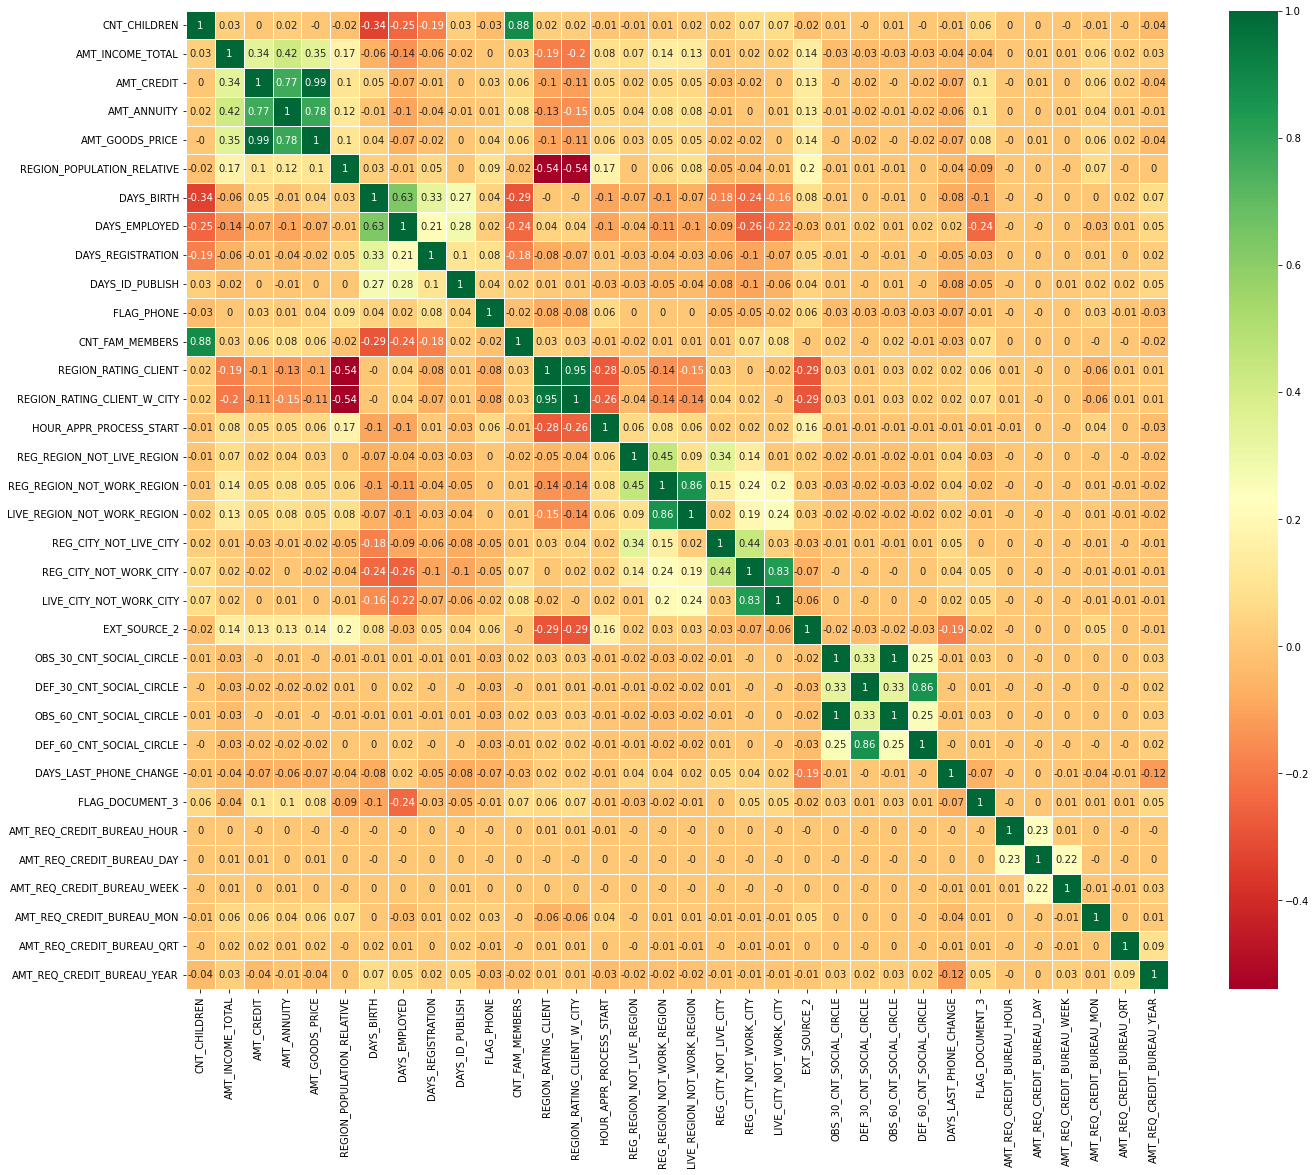

In [437]:
fig = plt.figure(figsize=(22,18))
axs = sns.heatmap(round(Others_df.corr(),2), cmap="RdYlGn",annot=True,linewidth =1)

High Correlation(>0.5)

AMT_CREDIT:AMT_GOODS_PRICE (0.99)
AMT_ANNUITY:AMT_GOODS_PRICE (0.78)
AMT_CREDIT:AMT_ANNUITY (0.77)
Credit amount is highly correlated to the goods price, annuity;

CNT_FAM_MEMBERS:CNT_CHILDREN (0.88)
The more children the more number of family members;

DAYS_BIRTH:DAYS_EMPLOYED (0.63)
The older people have more employment days;

LIVE_CITY_NOT_WORK_CITY:REG_CITY_NOT_WORK_CITY (0.83)
REGION_RATING_CLIENT:REGION_RATING_CLIENT_WITH_CITY (0.95)
Cities are a part of Region, so high correlation seems logical;

Low Correlation (<-0.5)
REGION_RATING_CLIENT:REGION_POPULATION_RELATIVE (-0.54)

In [ ]:
#Heatmap for defaulters

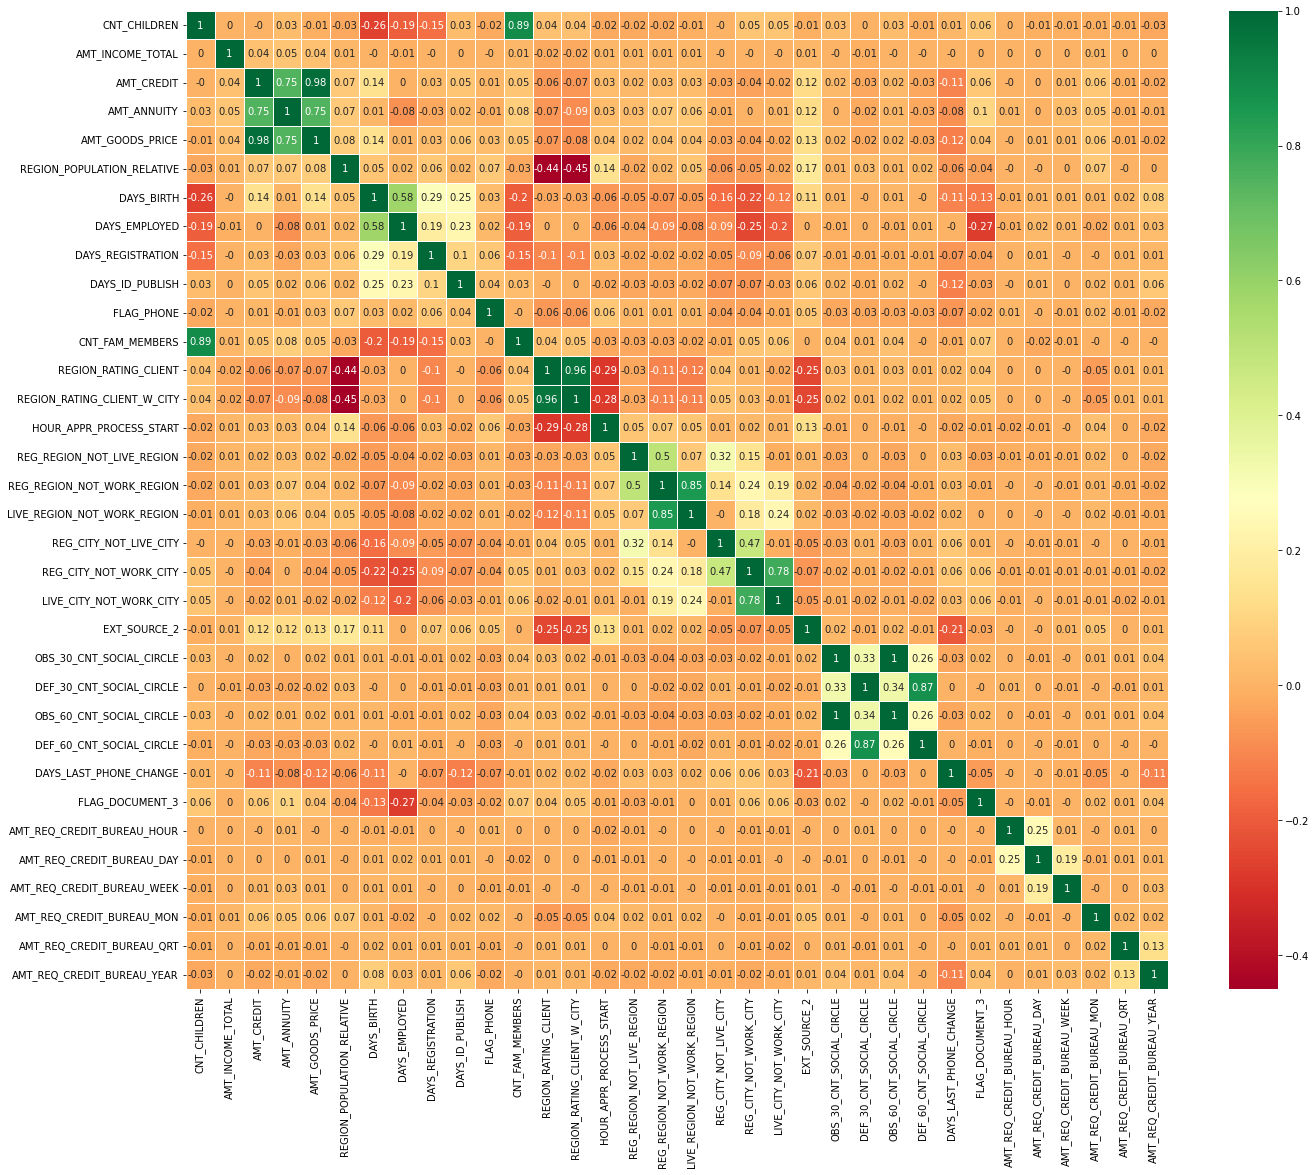

In [438]:
fig = plt.figure(figsize=(22,18))
axs = sns.heatmap(round(Defaulters_df.corr(),2), cmap="RdYlGn",annot=True,linewidth =1)

AMT_CREDIT:AMT_ANNUITY (0.75)
AMT_ANNUITY:AMT_GOODS_PRICE (0.75)
A subtle decrease in correlation of these factors is obsereved for defaulters;

AMT_CREDIT:AMT_INCOME_TOTAL (0.04)
This shows a drop in correlation as compared to others(0.34);

DAYS_BIRTH:DAYS_EMPLOYED (0.58)
For others it was 0.63;

In [439]:
#Pairplot for Amount columns

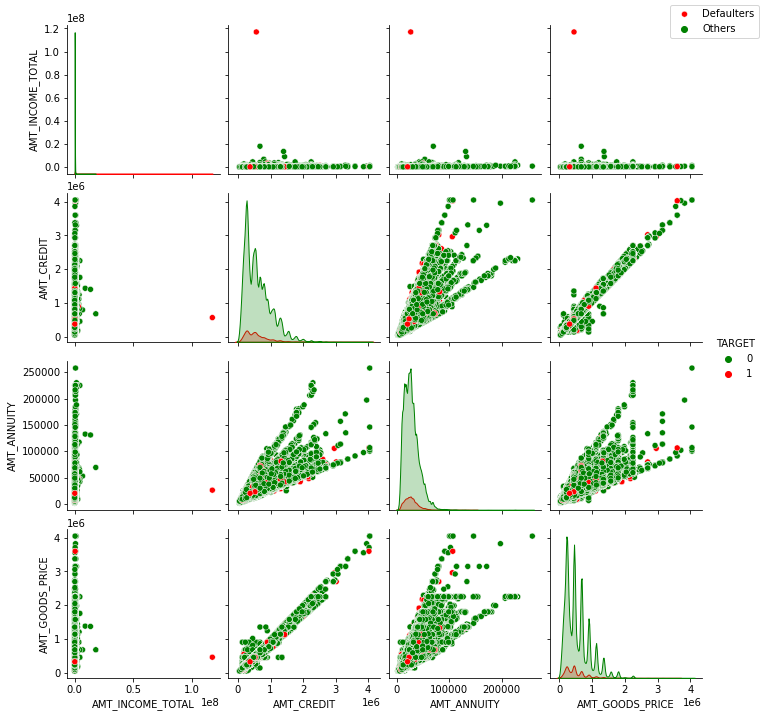

In [442]:
amt = df[[ 'AMT_INCOME_TOTAL','AMT_CREDIT','AMT_ANNUITY', 'AMT_GOODS_PRICE','TARGET']]
amt = amt[(amt["AMT_GOODS_PRICE"].notnull()) & (amt["AMT_ANNUITY"].notnull())]

anx= sns.pairplot(amt,hue="TARGET",palette=["g","r"])
anx.fig.legend(labels=['Defaulters','Others'])
plt.show()

Most of the values are consolidated below the range of 150000;
The amount credited for amount of goods price is colinear;
Most of the defaulters are under the range of 100000 for Amt_Annuity;
